# __The Science of Data Mining (Part1 2) - Data Collection__


## <font color="SeaGreen">__Insurance Company - Case Study__</font><br>


***
### 📖 __Introduction__
    
Within the scope of __Data Mining__, it was proposed a project, where the worker"s ability to build a Predictive Analytics model in accordance with the The CRoss Industry Standard Process for Data Mining (CRISP-DM) process, would be tested. There is one business problem from __PT Insurance__, a portuguese long standing insurance company that serves a wide array of insurance services.
    
***
### 📊 __Business Situation__

PT Insurance is a portuguese long standing insurance company that
serves a wide array of insurance services: Motor, Household, Health, Life and
Work Compensation. Although primarily serves portuguese customers, a
significant portion of their customer acquisition comes from their web site.
Customers can sign up to company services through their branches, by telephone, or
on the web site.

In 2016, became one of the largest insurers in Portugal. However, the lack
of a data driven culture in the company ultimately led to poorly maintained
databases over the years. Company is trying to make better use of the database it
has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no
attempts to identify target markets for cross-selling opportunities. Now, 
wants start differentiating customers, and developing more focused programs.

It provided you an ABT (Analytic Based Table) with data regarding a sample of
10.290 Customers from its active database. These are customers that had at
least one insurance service with the company at the time the dataset was
extracted. Your job is to segment the database and find the relevant clusters
of customers. To do this, we suggest you segment the customers using different
perspectives and approaches, as well as combine and analyze the results. PT Insurance
would like to understand the value and demographics of each customer segment,
as well as understand which types of insurance they will be more interested in.
    
### 💾 __Metadata__

| Variable 		      | Description                              | Additional Information |
|---------------------|------------------------------------------|------------------------|
| ID 		          | ID 		                                 |                        |
| First Policy 		  | Year of the customer’s first policy      | (1)                    |
| Birthday            | Customer’s Birthday Year                 | (2)                    |
| Education           | Academic Degree                          |                        |
| Salary              | Gross monthly salary (€) 		         |                        |
| Area 		          | Living area 		                     | (3)                    |
| Children 		      | Binary variable (Y=1) 		             |                        |
| CMV 		          | Customer Monetary Value 		         | (4)                    |
| Claims 		      | Claims Rate 		                     | (5)                    |
| Motor 		      | Premiums (€) in LOB: Motor 		         | (6)                    |
| Household 		  | Premiums (€) in LOB: Household 		     | (6)                    |
| Health 		      | Premiums (€) in LOB: Health 		     | (6)                    |
| Life 		          | Premiums (€) in LOB: Life 		         | (6)                    |
| Work Compensation   | Premiums (€) in LOB: Work Compensations  | (6)                    |

<br>
<details open>
    <summary> 
       <font color="SeaGreen" size =3>To see/hide Additional Information click here:</font>
    </summary><br>

> 1. May be considered as the first year as a customer
> 2. The current year of the database is 2016
> 3. No further information provided about the meaning of the area codes
> 4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
> 5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
> 6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

Notice the data was stored in a SAS database file. There may be some intricacies when
reading this file type using Python. Make sure the data is being
imported properly and that you remove (before or after converting it to a
pandas data frame) any irrelevant rows/columns you may find.

<font color="SeaGreen" size =3>Expected outcomes</font>

> 1. Explore the data and identify the variables that should be used to segment customers.
> 2. Identify customer segments
> 3. Justify the number of clusters you chose (taking in consideration the business use as well).
> 4. Explain the clusters found.
> 5. Suggest business applications for the findings and define general marketing
   approaches for each cluster.

**Note:** Invest time into evaluating your preprocessing pipeling, thinking
how you want to do your clustering, possible approaches, and advantages or
disadvantages of different decisions.

***
### 📋 Index <a class="anchor"><a id="index"></a>
    
> ### [<font color="white"> 1. Data Collection</font>](#one)
>> #### [<font color="lightGrey"> 1.1 Importing Libraries</font>](#oneone)
>> #### [<font color="lightGrey"> 1.2 Importing Dataset</font>](#onetwo)    
> ### [<font color="White"> 2. Feature Extraction and Portability</font>](#two)
>> #### [<font color="lightGrey"> 2.1 Missing Values</font>](#twoone)
>> #### [<font color="lightGrey"> 2.2 Duplicates</font>](#twotwo)
>> #### [<font color="lightGrey"> 2.3 Outlier Detection</font>](#twothree)
>>> ##### [<font color="Grey"> 2.3.1 Interquartile Range Method</font>](#twothreeone)
>>> ##### [<font color="Grey"> 2.3.2 Z-Score Method</font>](#twothreetwo)
>>> ##### [<font color="Grey"> 2.3.3 Density Based Local Outlier Factor Methods (LOF)</font>](#twothreethree)
>> #### [<font color="lightGrey"> 2.4 Redundancy Study</font>](#twofour)
>>> ##### [<font color="Grey"> 2.4.1 Pearson Correlation</font>](#twofourone)
>>> ##### [<font color="Grey"> 2.4.2 Spearman Correlation</font>](#twofourtwo)
>> #### [<font color="lightGrey"> 2.5 Standardization and Normalization</font>](#twofive)
>>> ##### [<font color="Grey"> 2.5.1 Normalization</font>](#twofiveone)
>>> ##### [<font color="Grey"> 2.5.2 Standardization</font>](#twofivetwo)
>> #### [<font color="lightGrey"> 2.6 Categorical Features Encoding</font>](#twosix)


***


    

Importing Libraries, __Data Extraction and Merging datasets accordingly to its nature, i.e., if its train or test data.__ <p>

*** 
## <font color="White"> 1 Data Collection <a class="anchor" id="one"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
### <font color="White"> 1.1 Importing Libraries <a class="anchor" id="oneone"></a>

[<font color="grey">Back to Index </font>](#index)


In [444]:
import pyreadstat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


*** 
### <font color="White"> 1.2 Importing Dataset <a class="anchor" id="onetwo"></a>

[<font color="grey">Back to Index </font>](#index)

In [445]:
# Reading the SAS File
df, meta = pyreadstat.read_sas7bdat("a2z_insurance.sas7bdat")

***
## <font color="White">2. Feature Extraction and Portability </font> <a class="anchor" id="two"></a>

[<font color="grey">Back to Index </font>](#index)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10296 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [447]:
df.tail()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
10291,10292.0,1984.0,1949.0,4 - PhD,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,1 - Basic,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,3 - BSc/MSc,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1 - Basic,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91
10295,10296.0,1990.0,1981.0,4 - PhD,2815.0,1.0,1.0,463.75,0.27,414.08,94.45,141.25,6.89,12.89


In [448]:
# Additionally, for personal preference, we will changing CustID data type to 
# int64 (integer number)
df["CustID"] = df["CustID"].astype("int64")

# Setting Customer ID as dataframe index, inplace = True will save the setting
df.set_index("CustID", inplace = True)

# Saving raw data following good practices
raw = df.copy()

# Checking top 5 rows
df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [449]:
df.describe()

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [450]:
# We define categorical by hand once df only regard 2
# Additionally change the result to a list.
categorical = df[["EducDeg","Children","GeoLivArea"]].columns.to_list()
# Dropping all categoriccal feactures will result in a list of the numerical ones.
numerical = df.columns.drop(categorical).to_list()

# "format" allows to fill the {} in print be the same order.
print("Numerical Feactures: {}\n\nCategorical Feactures: {}".format(numerical, categorical))

Numerical Feactures: ['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']

Categorical Feactures: ['EducDeg', 'Children', 'GeoLivArea']



*** 
### <font color="White"> 2.1 Missing Values <a class="anchor" id="twoone"></a>

[<font color="grey">Back to Index </font>](#index)

In [451]:
def missing_values(data: pd.DataFrame, threshold: float = 0.02):
    """
    This functions will return a pandas dataframe with feature"s missing values count in absolute and relative frequency
    The threshold is the max % of missing values, for a given threshold this function will return if the features are 
    above or bellow the given threshold limit (True for above or False for bellow).
    
    Parameters:
    * Data - function expect to receive the data in a pandas Dataframe formate
    * Threshold - function expect to receive an input for threshold variable from 0 to 1 (0 = 0% and 1 = 100%)
    """

    # Count the number os missing values per each feacture
    na_count = data.isna().sum()
    # Filter data feactures that have missing values
    na_exist = na_count[na_count > 0]
    # Save an array with absolute amount of missing values
    na_abs_frq = na_exist.values
    # Save an array with relative % of missing values
    na_rel_frq = round(na_exist/len(data),2)

    # Creating a pandas DataFrame with columns "Feature", "Nº of missings" and "% of missings" 
    missings = pd.DataFrame({"Nº of missings": na_abs_frq, "% of missings": na_rel_frq})
    # Sort values by "Nº of missings" in a descendent way 
    missings = missings.sort_values(by = "Nº of missings", ascending = False)

    # If threshold given then the column "Above threshold" is created and filled with True if count (x) above threshold else False
    if threshold:
        missings["Above threshold"] = [True if x > threshold else False for x in missings["% of missings"]]
        
    return missings

missing_values(df)

,Nº of missings,% of missings,Above threshold
PremLife,104,0.01,False
PremWork,86,0.01,False
PremHealth,43,0.00,False
MonthSal,36,0.00,False
PremMotor,34,0.00,False
FirstPolYear,30,0.00,False
Children,21,0.00,False
BirthYear,17,0.00,False
GeoLivArea,1,0.00,False


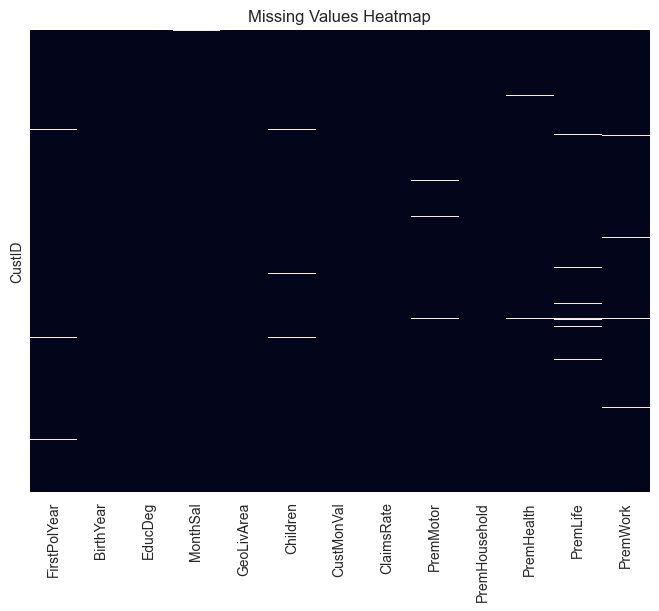

In [452]:
# Create a matplotlib figure with dimension (x, y) = (8, 6)
plt.figure(figsize=(8, 6))
# Create a seaborn heatmap to visualy understand the dimension of missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
# Add a title to heatmap
plt.title("Missing Values Heatmap")
plt.show()

#### __1. Eliminating data records that contain missing entries__

In [453]:
df.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [454]:
df_drop = df.copy()

In [455]:
df_drop.dropna(inplace=True)
df_drop.isnull().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

#### __2. Missing values may be estimated or imputed__

In [456]:
df_imp_mean = df.copy()
df_imp_median = df.copy()

__MEAN__

In [457]:
df[df.index.isin([69, 195, 462, 489])].PremLife

CustID
69    NaN
195   NaN
462   NaN
489   NaN
Name: PremLife, dtype: float64

In [458]:
# Imputing all missing values of numerical features with mean()
df_imp_mean[numerical] = df_imp_mean[numerical].fillna(df_imp_mean[numerical].mean())
# Count the null values per each column
df_imp_mean.isnull().sum()

FirstPolYear      0
BirthYear         0
EducDeg           0
MonthSal          0
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [459]:
df_imp_mean[df_imp_mean.index.isin([69, 195, 462, 489])].PremLife

CustID
69     41.855782
195    41.855782
462    41.855782
489    41.855782
Name: PremLife, dtype: float64

__MEDIAN__

In [460]:
# Imputing all missing values of numerical features with median()
df_imp_median[numerical] = df_imp_median[numerical].fillna(df_imp_median[numerical].median())
# Count the null values per each column
df_imp_median.isnull().sum()

FirstPolYear      0
BirthYear         0
EducDeg           0
MonthSal          0
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [461]:
df_imp_median[df_imp_median.index.isin([69, 195, 462, 489])].PremLife

CustID
69     25.56
195    25.56
462    25.56
489    25.56
Name: PremLife, dtype: float64

In [462]:
# For the practical part we will follow the imputation by median approach.
df[numerical] = df[numerical].fillna(df[numerical].median())

__MODE__

In [463]:
df['EducDeg'].value_counts()

EducDeg
3 - BSc/MSc        4799
2 - High School    3510
1 - Basic          1272
4 - PhD             698
                     17
Name: count, dtype: int64

In [464]:
df[df['EducDeg']==''].head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
897,1986.0,1960.0,,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
1708,1992.0,1946.0,,3827.0,4.0,0.0,355.52,0.33,222.71,146.70,162.81,94.13,105.24
2450,1986.0,1939.0,,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2729,1986.0,1954.0,,3200.0,2.0,0.0,109.25,0.77,211.93,14.45,275.72,77.68,11.67
2771,1986.0,1984.0,,1473.0,4.0,1.0,443.74,0.31,386.74,104.45,156.92,5.00,27.45


In [465]:
# Replace strange cases to NaN
df['EducDeg'].replace('', np.nan, inplace=True)
mode_educdeg = df['EducDeg'].mode().iloc[0]

# Fill missing values (including those previously set to NaN)
df['EducDeg'] = df['EducDeg'].fillna(mode_educdeg)

In [466]:
df[categorical].isnull().sum()

EducDeg        0
Children      21
GeoLivArea     1
dtype: int64

In [467]:
# For the practical part we will follow the imputation by mode approach.
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [468]:
df.isnull().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

*** 
### <font color="White"> 2.2 Duplicates <a class="anchor" id="twotwo"></a>

[<font color="grey">Back to Index </font>](#index)

In [469]:
df_duplicated = df.copy()

In [470]:
# Result in the First duplicated rows
df_duplicated[df_duplicated.duplicated(keep = "first")]

# Drop the First duplicated rows
# df_duplicated.drop(df_duplicated[df_duplicated.duplicated(keep = "first")].index, inplace=True)

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
8014,1987.0,1987.0,2 - High School,1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8122,1977.0,1974.0,2 - High School,2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9554,1986.0,1952.0,2 - High School,3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


In [471]:
# Result in the Last duplicated rows
df_duplicated[df_duplicated.duplicated(keep = "last")]

# Drop the Last duplicated rows
# df_duplicated.drop(df_duplicated[df_duplicated.duplicated(keep = "last")].index, inplace=True)

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2076,1977.0,1974.0,2 - High School,2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
2100,1987.0,1987.0,2 - High School,1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
3507,1986.0,1952.0,2 - High School,3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


*** 
### <font color="White"> 2.3 Outlier Detection <a class="anchor" id="twothree"></a>

[<font color="grey">Back to Index </font>](#index)

*** 
#### <font color="White"> 2.3.1 Interquartile Range Method (IQR) <a class="anchor" id="twothreeone"></a>

[<font color="grey">Back to Index </font>](#index)

After Analysis in Part 2 we conclude that: 
* __Directly by IQR:__ Features "FirstPolYear", "BirthYear", "MonthSal", "CustMonVal"
* __By hand:__ Features "PremMotor "> 6000, "PremHousehold "> 5000, "PremHealth"> 5000 and "ClaimsRate "> 250



99.99 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in FirstPolYear: 1

Outlier values in FirstPolYear:

Value from Client 9295:  53784.0 



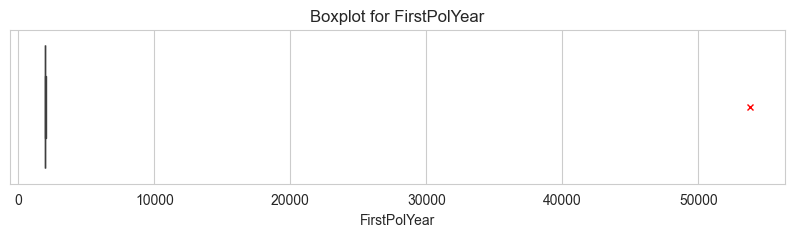



99.981 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in BirthYear: 1

Outlier values in BirthYear:

Value from Client 7196:  1028.0 



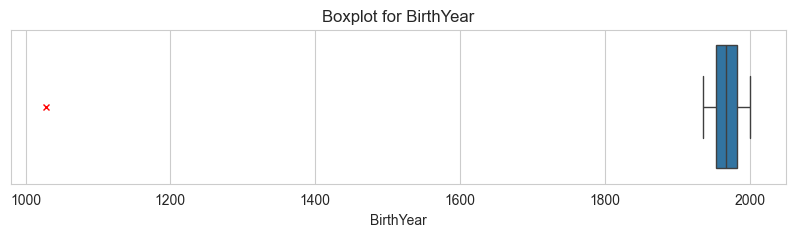



99.961 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in MonthSal: 2

Outlier values in MonthSal:

Value from Client 5883:  55215.0 

Value from Client 8262:  34490.0 



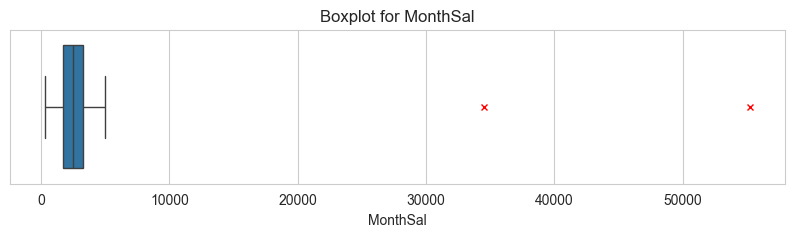



98.893 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in CustMonVal: 110

Outlier values in CustMonVal:

Value from Client 52:  -14714.08 

Value from Client 113:  -8719.04 

Value from Client 136:  -10198.91 

Value from Client 172:  -165680.42 

Value from Client 258:  1105.42 

Value from Client 266:  1160.88 

Value from Client 302:  1356.71 

Value from Client 601:  1033.08 

Value from Client 629:  1448.28 

Value from Client 650:  1182.44 

Value from Client 656:  -64891.0 

Value from Client 676:  -52382.76 

Value from Client 699:  1141.12 

Value from Client 708:  -28945.4 

Value from Client 759:  -10107.37 

Value from Client 794:  -7851.17 

Value from Client 852:  1376.16 

Value from Client 866:  1113.78 

Value from Client 909:  1254.24 

Value from Client 918:  -26130.45 

Value from Client 952:  -2642.91 

Value from Client 983:  -6115.85 

Value from Client 1026:  -2082.83 

Value from Client 1098:  1052.55 

Value from 

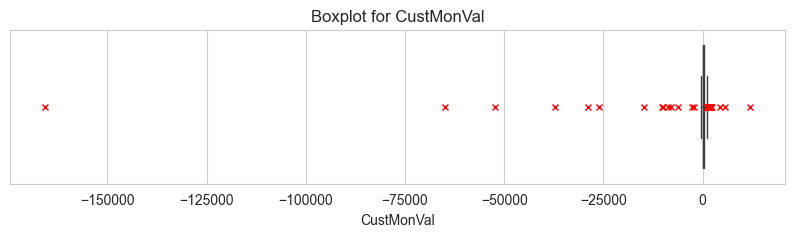



98.747 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in ClaimsRate: 15

Outlier values in ClaimsRate:

Value from Client 52:  25.36 

Value from Client 113:  15.65 

Value from Client 136:  14.8 

Value from Client 172:  256.2 

Value from Client 656:  96.0 

Value from Client 676:  63.0 

Value from Client 708:  35.0 

Value from Client 759:  12.6 

Value from Client 794:  13.9 

Value from Client 918:  32.3 

Value from Client 952:  5.6 

Value from Client 983:  9.87 

Value from Client 1026:  4.36 

Value from Client 7963:  4.33 

Value from Client 9649:  69.0 



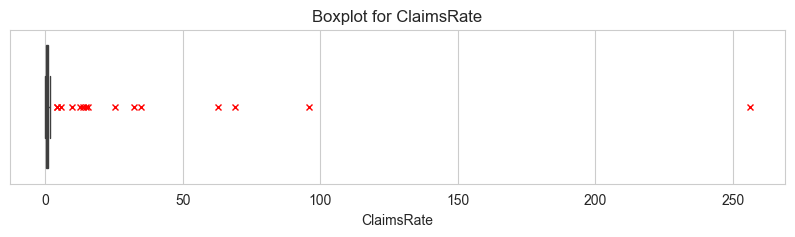



98.689 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in PremMotor: 6

Outlier values in PremMotor:

Value from Client 5129:  4003.44 

Value from Client 5212:  8744.61 

Value from Client 5294:  11604.42 

Value from Client 6702:  4273.49 

Value from Client 7086:  5645.5 

Value from Client 7905:  3106.62 



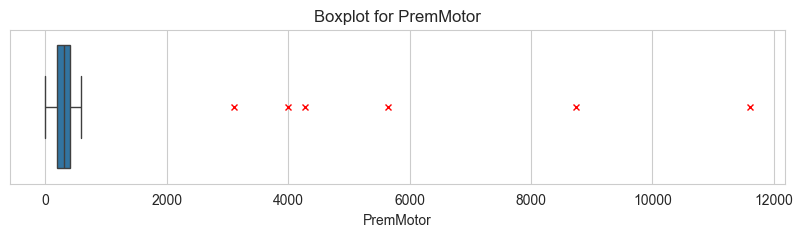



92.541 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in PremHousehold: 633

Outlier values in PremHousehold:

Value from Client 109:  912.95 

Value from Client 128:  750.15 

Value from Client 153:  785.7 

Value from Client 187:  1026.3 

Value from Client 203:  927.4 

Value from Client 234:  808.5 

Value from Client 256:  725.15 

Value from Client 258:  1012.4 

Value from Client 266:  727.35 

Value from Client 296:  725.15 

Value from Client 302:  1089.1 

Value from Client 317:  1025.75 

Value from Client 331:  695.7 

Value from Client 351:  695.7 

Value from Client 393:  791.25 

Value from Client 395:  942.4 

Value from Client 448:  677.9 

Value from Client 464:  760.7 

Value from Client 476:  1363.6 

Value from Client 481:  683.45 

Value from Client 511:  840.15 

Value from Client 535:  771.8 

Value from Client 553:  956.3 

Value from Client 562:  682.9 

Value from Client 569:  688.45 

Value from Client 583:  730

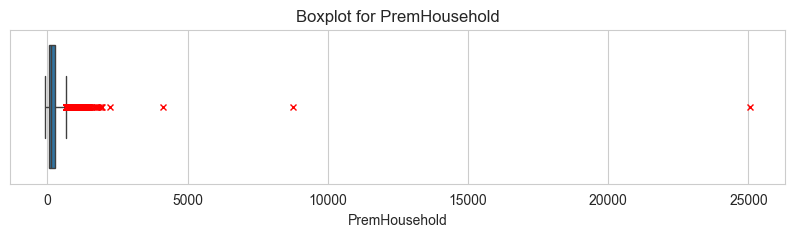



92.249 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in PremHealth: 30

Outlier values in PremHealth:

Value from Client 106:  408.41 

Value from Client 146:  381.85 

Value from Client 392:  380.74 

Value from Client 445:  379.85 

Value from Client 525:  440.86 

Value from Client 794:  398.41 

Value from Client 1113:  432.97 

Value from Client 1233:  381.96 

Value from Client 1515:  401.63 

Value from Client 2010:  442.86 

Value from Client 3008:  383.96 

Value from Client 3444:  381.96 

Value from Client 3611:  384.74 

Value from Client 4968:  389.74 

Value from Client 5184:  398.41 

Value from Client 5212:  1767.0 

Value from Client 5219:  383.74 

Value from Client 5294:  1045.52 

Value from Client 5430:  380.74 

Value from Client 6468:  393.74 

Value from Client 6617:  417.3 

Value from Client 6697:  381.85 

Value from Client 6962:  394.52 

Value from Client 7287:  379.85 

Value from Client 7962:  7322.48 

Valu

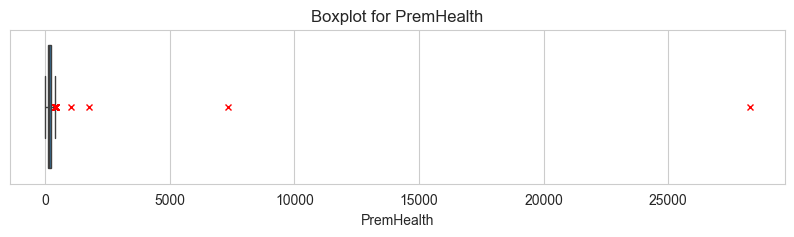



85.927 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in PremLife: 651

Outlier values in PremLife:

Value from Client 2:  194.48 

Value from Client 14:  267.94 

Value from Client 41:  146.36 

Value from Client 45:  224.71 

Value from Client 99:  185.48 

Value from Client 109:  213.04 

Value from Client 136:  136.47 

Value from Client 148:  131.47 

Value from Client 153:  136.47 

Value from Client 167:  128.69 

Value from Client 235:  175.7 

Value from Client 289:  145.25 

Value from Client 290:  140.47 

Value from Client 329:  197.37 

Value from Client 340:  223.71 

Value from Client 342:  219.04 

Value from Client 353:  148.25 

Value from Client 355:  167.92 

Value from Client 367:  130.69 

Value from Client 371:  231.71 

Value from Client 393:  181.59 

Value from Client 398:  193.48 

Value from Client 405:  158.92 

Value from Client 424:  148.25 

Value from Client 425:  130.69 

Value from Client 433:  213.15 

V

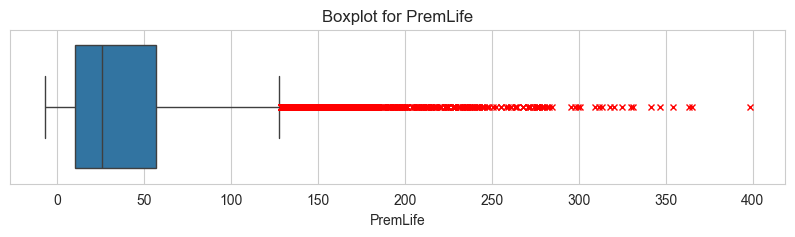



79.584 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in PremWork: 653

Outlier values in PremWork:

Value from Client 41:  148.03 

Value from Client 102:  156.03 

Value from Client 108:  146.14 

Value from Client 148:  151.25 

Value from Client 150:  451.53 

Value from Client 180:  209.04 

Value from Client 187:  212.15 

Value from Client 192:  225.6 

Value from Client 235:  164.03 

Value from Client 251:  139.36 

Value from Client 258:  128.8 

Value from Client 289:  149.25 

Value from Client 302:  150.14 

Value from Client 353:  181.7 

Value from Client 398:  225.82 

Value from Client 400:  140.25 

Value from Client 402:  195.37 

Value from Client 405:  137.58 

Value from Client 448:  140.58 

Value from Client 481:  249.16 

Value from Client 484:  160.14 

Value from Client 495:  212.04 

Value from Client 502:  170.7 

Value from Client 523:  165.81 

Value from Client 527:  164.14 

Value from Client 541:  298.5 



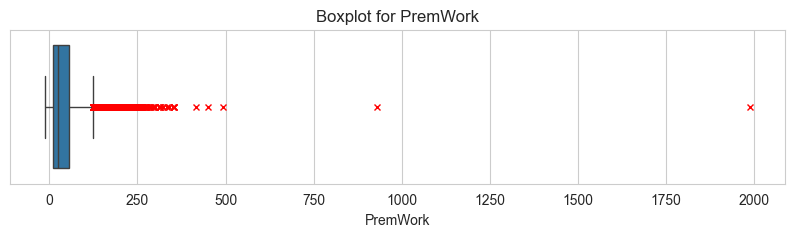

In [472]:
def check_IQR_outliers(data: pd.DataFrame, criterion: int):
    """
    This function setects outliers by generating a decision range based 
    on a criterion (threshold) and locating values that don"t fall within this range. 
    Can return the cleaned dataframe without the outliers and other with outliers excluded, the percentage of remaining data
    after outlier removal and the values considered as outliers for each column.
    
    Args: 
        data (pandas.DataFrame) : set of data 
        criterion (float) : IQR multiplier, the higher, the larger the decision range
    """
    outliers = pd.DataFrame()  # Define that outliers is a DataFrame
    cleaned_data = data.copy()  # Make a copy of the original data to create cleaned_data

    for col in cleaned_data.columns:
        # Calculate quartiles and IQR for the specified feature
        Q1 = data[col].quantile(0.25) # First quartile
        Q3 = data[col].quantile(0.75) # Third quartile
        IQR = Q3 - Q1 # Interquartile range

        lower_lim = Q1 - criterion * IQR # Setting lower limit accroding to criteria 
        upper_lim = Q3 + criterion * IQR # Setting upper limit accroding to criteria 

        # Identify outliers for the specified column
        col_outliers = data[(data[col] < lower_lim) | (data[col] > upper_lim)]
        outliers = pd.concat([outliers, col_outliers])

        # Exclude outliers from the cleaned_data DataFrame
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_lim) & (cleaned_data[col] <= upper_lim)]

        # Print functionalities:
        ## \n - Paragraph
        ## \033[1m - Begining of Bolt
        ## \033[0m - End of Bolt
        print(f"\n\n\033[1m{round(100 - len(outliers) / len(data) * 100, 3)} %\033[0m of remaining data after IQR method outlier removal, when criterion is", criterion)
        print(f"\nOutliers Count in \033[1m{col}\033[0m: {len(col_outliers)}\n")
        print(f"Outlier values in \033[1m{col}\033[0m:\n")
        for idx, val in col_outliers.iterrows():
            print(f"Value from Client {idx}: \033[1m", round(val[col], 2), "\033[0m\n")

        # Create a boxplot
        flierprops = dict(marker="x", markersize=5, markeredgecolor="red", alpha=1)
        plt.figure(figsize=(10, 2))
        sns.set_style("whitegrid")
        sns.boxplot(x=data[col], flierprops=flierprops)
        plt.title(f"Boxplot for {col}")
        plt.show()

    return outliers, cleaned_data

# Execute function to analyze in detail all the possible outliers
outliers, cleaned_data = check_IQR_outliers(data=df[numerical], criterion=1.5)



99.99 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in FirstPolYear: 1

Outlier values in FirstPolYear:

Value from Client 9295:  53784.0 



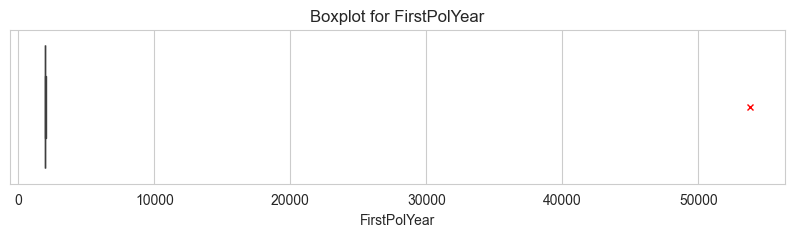



99.981 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in BirthYear: 1

Outlier values in BirthYear:

Value from Client 7196:  1028.0 



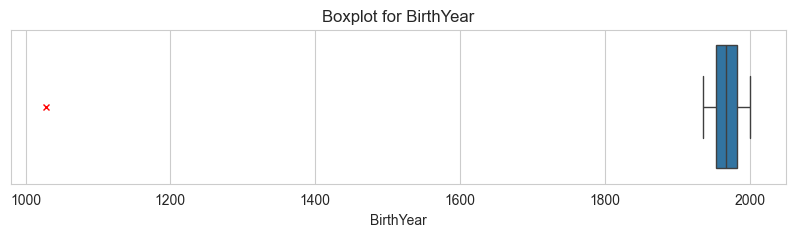



99.961 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in MonthSal: 2

Outlier values in MonthSal:

Value from Client 5883:  55215.0 

Value from Client 8262:  34490.0 



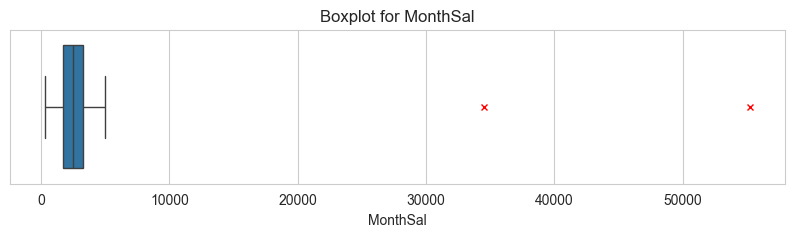



98.893 % of remaining data after IQR method outlier removal, when criterion is 1.5

Outliers Count in CustMonVal: 110

Outlier values in CustMonVal:

Value from Client 52:  -14714.08 

Value from Client 113:  -8719.04 

Value from Client 136:  -10198.91 

Value from Client 172:  -165680.42 

Value from Client 258:  1105.42 

Value from Client 266:  1160.88 

Value from Client 302:  1356.71 

Value from Client 601:  1033.08 

Value from Client 629:  1448.28 

Value from Client 650:  1182.44 

Value from Client 656:  -64891.0 

Value from Client 676:  -52382.76 

Value from Client 699:  1141.12 

Value from Client 708:  -28945.4 

Value from Client 759:  -10107.37 

Value from Client 794:  -7851.17 

Value from Client 852:  1376.16 

Value from Client 866:  1113.78 

Value from Client 909:  1254.24 

Value from Client 918:  -26130.45 

Value from Client 952:  -2642.91 

Value from Client 983:  -6115.85 

Value from Client 1026:  -2082.83 

Value from Client 1098:  1052.55 

Value from 

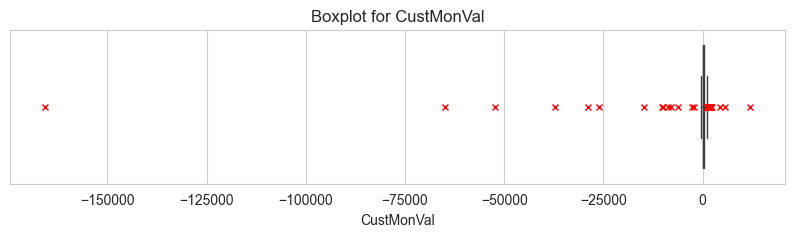

In [473]:
# List of features to apply IQR outlier removal
iqr_features = ["FirstPolYear", "BirthYear", "MonthSal", "CustMonVal"]

# Execute function on specified features of Data 
outliers, cleaned_data = check_IQR_outliers(data=df[iqr_features], criterion=1.5)

In [474]:
# =========== Exclusion by IQR =========== #

# Excluding outlier customers by IQR 
df = df[df.index.isin(cleaned_data.index)]


# =========== Exclusion by Hand =========== #

# Defining conditions from detailed analysis
condition1 = df["PremMotor"] > 6000
condition2 = df["PremHousehold"] > 5000
condition3 = df["PremHealth"] > 5000
condition4 = df["ClaimsRate"] > 250
condition5 = df["PremWork"] > 1000

# Combining all the defined conditions
combined_condition = condition1 | condition2 | condition3 | condition4 | condition5

# Applying the combined condition to exclude rows
df = df[~combined_condition].copy()

df.shape

(10178, 13)

*** 
#### <font color="White"> 2.3.2 Z-Score Method <a class="anchor" id="twothreetwo"></a>

[<font color="grey">Back to Index </font>](#index)



100.0 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in FirstPolYear: 0

Outlier values in FirstPolYear:



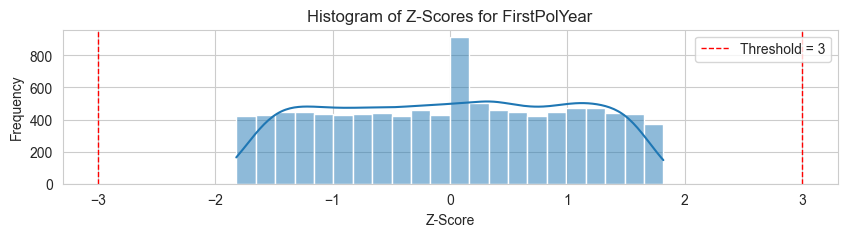

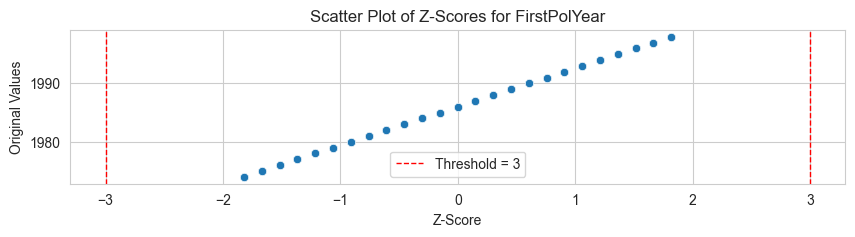



100.0 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in BirthYear: 0

Outlier values in BirthYear:



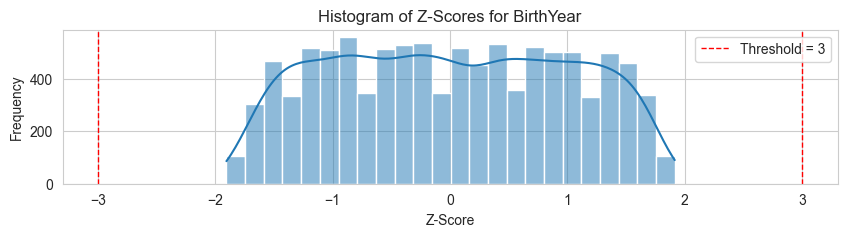

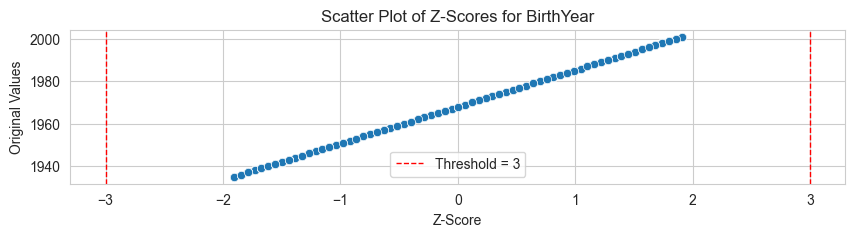



100.0 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in MonthSal: 0

Outlier values in MonthSal:



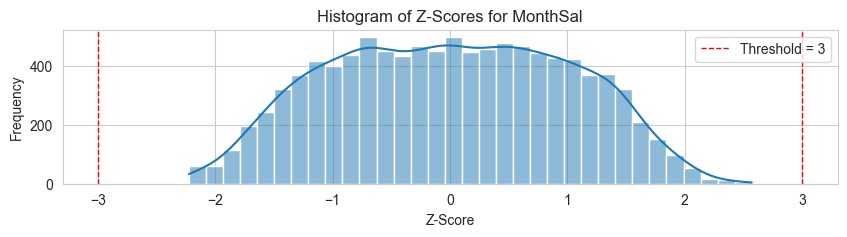

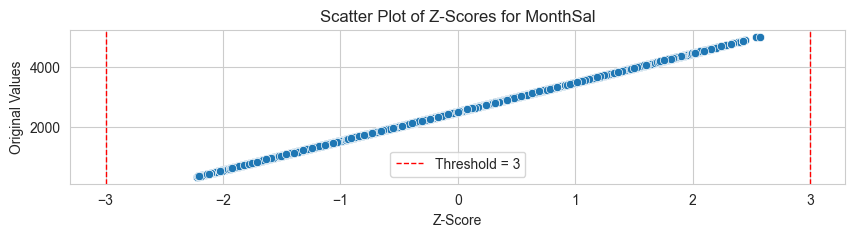



99.607 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in CustMonVal: 40

Outlier values in CustMonVal:

Value from Client 395:  995.86 

Value from Client 477:  1003.64 

Value from Client 662:  941.52 

Value from Client 707:  980.4 

Value from Client 871:  956.3 

Value from Client 893:  960.52 

Value from Client 901:  958.86 

Value from Client 1795:  981.3 

Value from Client 1913:  1010.74 

Value from Client 2591:  995.74 

Value from Client 2692:  945.3 

Value from Client 2983:  979.76 

Value from Client 3026:  950.41 

Value from Client 3086:  951.51 

Value from Client 3331:  935.18 

Value from Client 3647:  970.52 

Value from Client 4256:  946.06 

Value from Client 4482:  984.4 

Value from Client 4672:  997.09 

Value from Client 4907:  974.18 

Value from Client 5051:  934.51 

Value from Client 5065:  1008.74 

Value from Client 5137:  945.84 

Value from Client 5224:  979.97 

Value from Client 5869:  990.29 

Value 

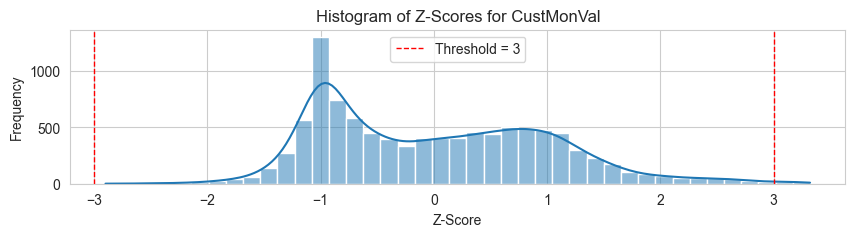

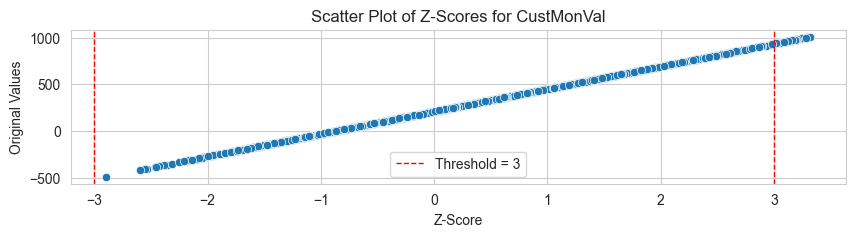



99.597 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in ClaimsRate: 1

Outlier values in ClaimsRate:

Value from Client 7963:  4.33 



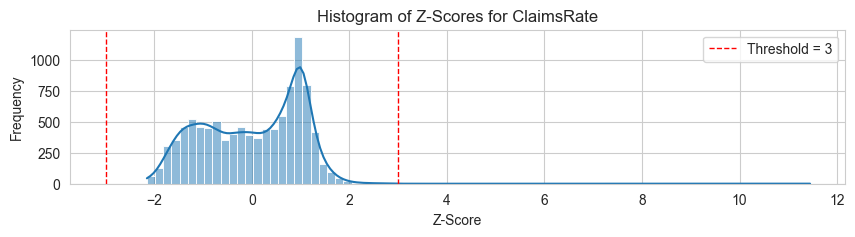

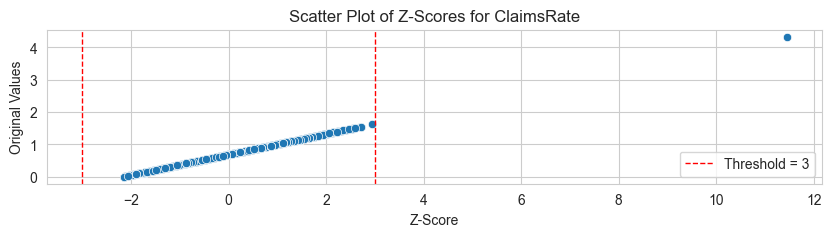



99.578 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in PremMotor: 2

Outlier values in PremMotor:

Value from Client 5129:  4003.44 

Value from Client 7905:  3106.62 



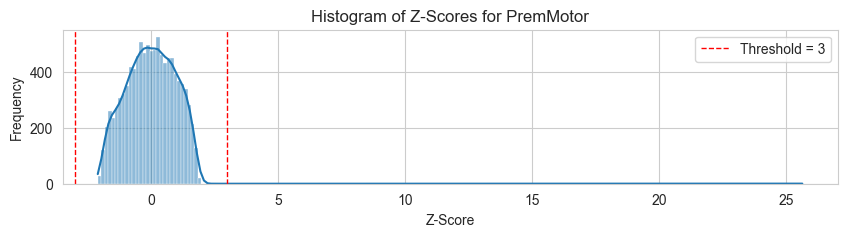

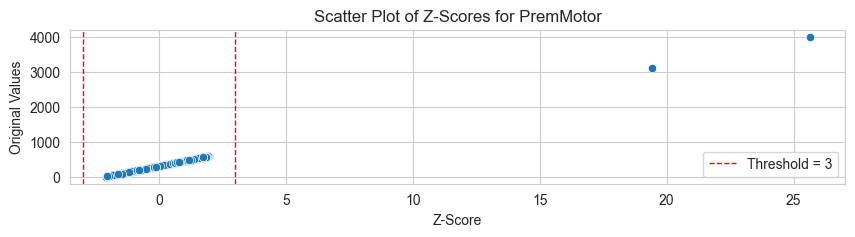



97.878 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in PremHousehold: 173

Outlier values in PremHousehold:

Value from Client 109:  912.95 

Value from Client 187:  1026.3 

Value from Client 203:  927.4 

Value from Client 317:  1025.75 

Value from Client 395:  942.4 

Value from Client 476:  1363.6 

Value from Client 553:  956.3 

Value from Client 660:  1079.65 

Value from Client 662:  917.4 

Value from Client 691:  1083.55 

Value from Client 758:  931.3 

Value from Client 764:  1286.9 

Value from Client 767:  1100.2 

Value from Client 775:  1020.2 

Value from Client 871:  981.3 

Value from Client 970:  893.5 

Value from Client 971:  1020.75 

Value from Client 996:  882.95 

Value from Client 1064:  884.6 

Value from Client 1070:  1777.55 

Value from Client 1105:  1041.85 

Value from Client 1149:  924.05 

Value from Client 1175:  873.5 

Value from Client 1337:  909.05 

Value from Client 1355:  1201.9 

Value from 

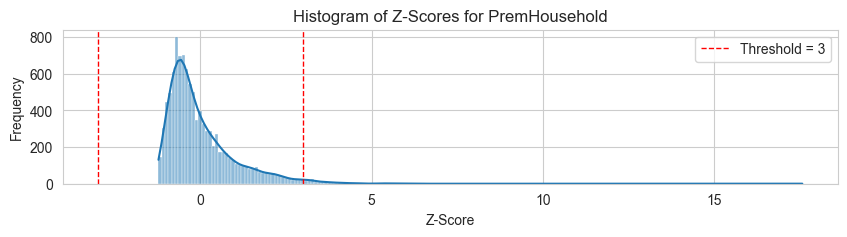

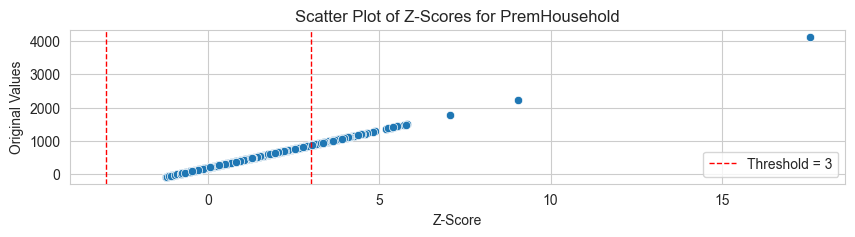



97.77 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in PremHealth: 11

Outlier values in PremHealth:

Value from Client 106:  408.41 

Value from Client 525:  440.86 

Value from Client 1113:  432.97 

Value from Client 1515:  401.63 

Value from Client 2010:  442.86 

Value from Client 5184:  398.41 

Value from Client 6468:  393.74 

Value from Client 6617:  417.3 

Value from Client 6962:  394.52 

Value from Client 10043:  390.74 

Value from Client 10264:  417.08 



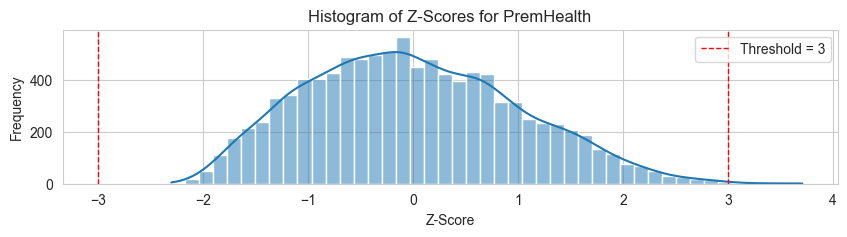

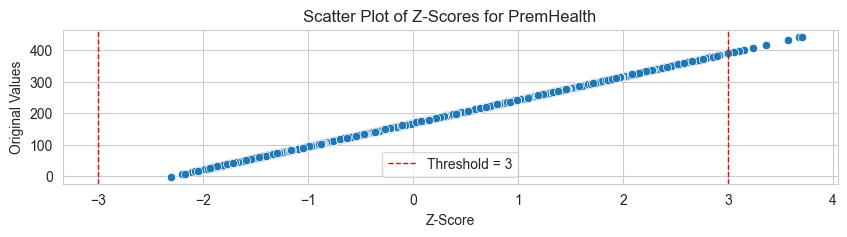



95.647 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in PremLife: 216

Outlier values in PremLife:

Value from Client 2:  194.48 

Value from Client 14:  267.94 

Value from Client 45:  224.71 

Value from Client 99:  185.48 

Value from Client 109:  213.04 

Value from Client 329:  197.37 

Value from Client 340:  223.71 

Value from Client 342:  219.04 

Value from Client 371:  231.71 

Value from Client 398:  193.48 

Value from Client 433:  213.15 

Value from Client 469:  242.49 

Value from Client 523:  183.48 

Value from Client 535:  228.71 

Value from Client 559:  199.37 

Value from Client 583:  201.15 

Value from Client 586:  184.48 

Value from Client 647:  198.37 

Value from Client 660:  252.27 

Value from Client 662:  279.72 

Value from Client 691:  211.93 

Value from Client 696:  193.48 

Value from Client 765:  213.15 

Value from Client 894:  261.16 

Value from Client 1184:  186.48 

Value from Client 1302:  354.

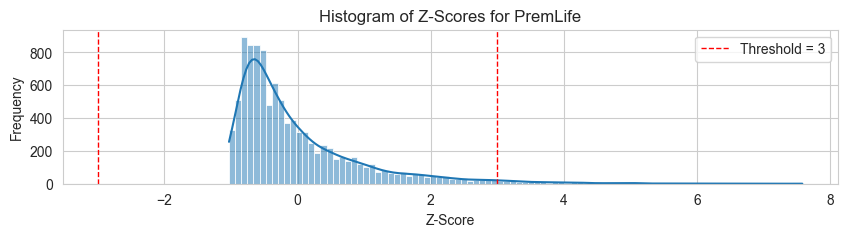

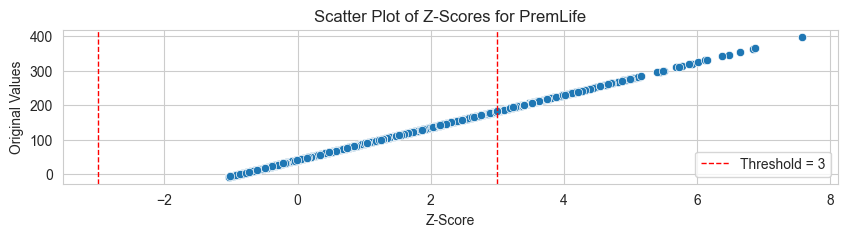



93.545 % of remaining data after Z-Score method outlier removal, when threshold is 3

Outliers Count in PremWork: 214

Outlier values in PremWork:

Value from Client 150:  451.53 

Value from Client 180:  209.04 

Value from Client 187:  212.15 

Value from Client 192:  225.6 

Value from Client 353:  181.7 

Value from Client 398:  225.82 

Value from Client 402:  195.37 

Value from Client 481:  249.16 

Value from Client 495:  212.04 

Value from Client 541:  298.5 

Value from Client 575:  208.26 

Value from Client 690:  256.05 

Value from Client 696:  241.6 

Value from Client 764:  240.49 

Value from Client 765:  200.26 

Value from Client 871:  223.93 

Value from Client 896:  249.49 

Value from Client 930:  208.15 

Value from Client 1025:  253.49 

Value from Client 1058:  183.37 

Value from Client 1110:  180.81 

Value from Client 1145:  180.81 

Value from Client 1169:  185.7 

Value from Client 1179:  179.7 

Value from Client 1277:  180.7 

Value from Client 1355:  

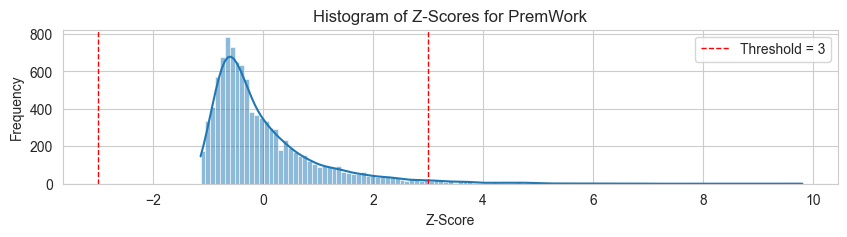

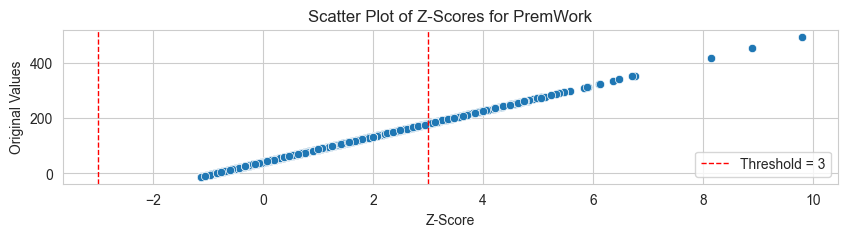

In [475]:
def check_ZScore_outliers(data: pd.DataFrame, z_threshold: float):
    """
    This function detects outliers using Z-Score by generating a decision range based 
    on a Z-Score threshold and locating values that fall beyond this range. 
    It return the cleaned dataframe without the outliers and other with outliers excluded, the percentage of remaining data
    after outlier removal, and the values considered as outliers for each column.
    
    Args: 
        data (pandas.core.frame.DataFrame): set of data 
        z_threshold (float): Z-Score threshold, the higher, the larger the decision range
    """
    outliers = pd.DataFrame()  # Define that outliers is a DataFrame
    cleaned_data = data.copy()  # Make a copy of the original data to create cleaned_data

    for col in cleaned_data.columns:
        # Calculate Z-Scores for the specified column
        z_scores = (data[col] - data[col].mean()) / data[col].std()

        # Identify outliers for the specified column based on Z-Score threshold
        col_outliers = data[np.abs(z_scores) > z_threshold]
        outliers = pd.concat([outliers, col_outliers])

        # Exclude outliers from the cleaned_data DataFrame
        cleaned_data = cleaned_data[~cleaned_data.index.isin(col_outliers.index)]

        print(f"\n\n\033[1m{round(100 - len(outliers) / len(data) * 100, 3)} %\033[0m of remaining data after Z-Score method outlier removal, when threshold is", z_threshold)
        print(f"\nOutliers Count in \033[1m{col}\033[0m: {len(col_outliers)}\n")
        print(f"Outlier values in \033[1m{col}\033[0m:\n")
        for idx, val in col_outliers.iterrows():
            print(f"Value from Client {idx}: \033[1m", round(val[col], 2), "\033[0m\n")

        # Create a histogram
        plt.figure(figsize=(10, 2))
        sns.histplot(z_scores, kde=True)
        plt.axvline(z_threshold, color='r', linestyle='dashed', linewidth=1, label=f'Threshold = {z_threshold}')
        plt.axvline(-z_threshold, color='r', linestyle='dashed', linewidth=1)
        plt.title(f"Histogram of Z-Scores for {col}")
        plt.xlabel("Z-Score")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

        # Create a scatter
        plt.figure(figsize=(10, 2))
        sns.scatterplot(x=z_scores, y=data[col])
        plt.axvline(z_threshold, color='r', linestyle='dashed', linewidth=1, label=f'Threshold = {z_threshold}')
        plt.axvline(-z_threshold, color='r', linestyle='dashed', linewidth=1)
        plt.title(f"Scatter Plot of Z-Scores for {col}")
        plt.xlabel("Z-Score")
        plt.ylabel("Original Values")
        plt.legend()
        plt.show()

    return outliers, cleaned_data

# Execute function to analyze in detail all the possible outliers using Z-Score
outliers_zscore, cleaned_data_zscore = check_ZScore_outliers(data=df[numerical], z_threshold=3)

*** 
#### <font color="White"> 2.3.3 Density Based Local Outlier Factor Methods (LOF) <a class="anchor" id="twothreethree"></a>

[<font color="grey">Back to Index </font>](#index)

C:\Users\joaom\AppData\Local\Temp\ipykernel_24024\2752076141.py:36: RuntimeWarning: invalid value encountered in divide
  radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())


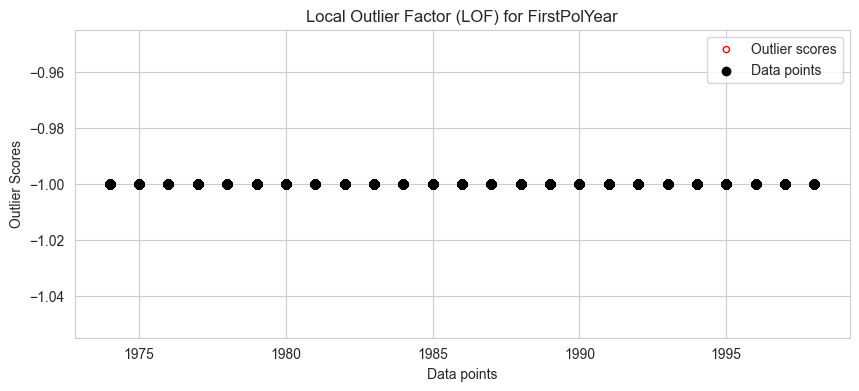

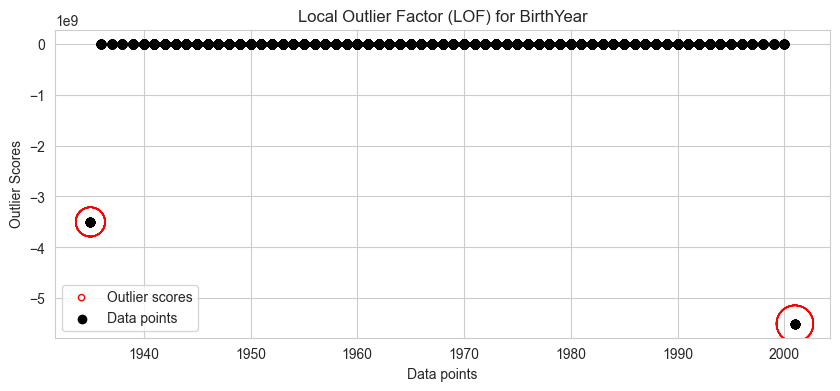

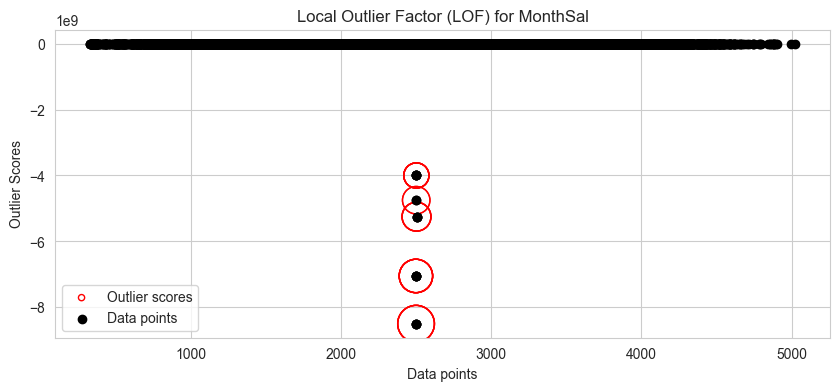

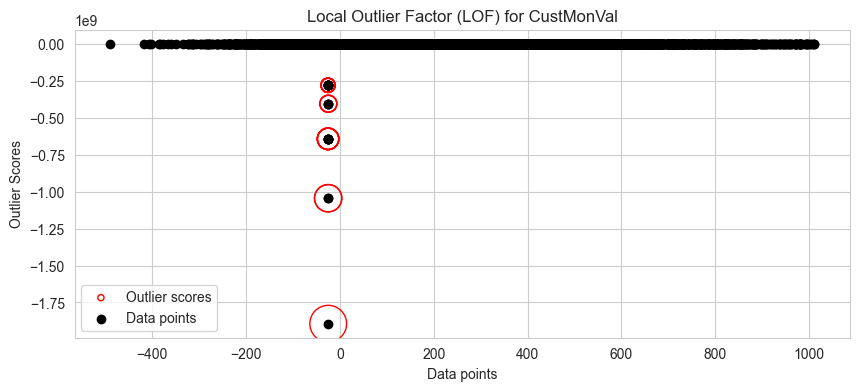

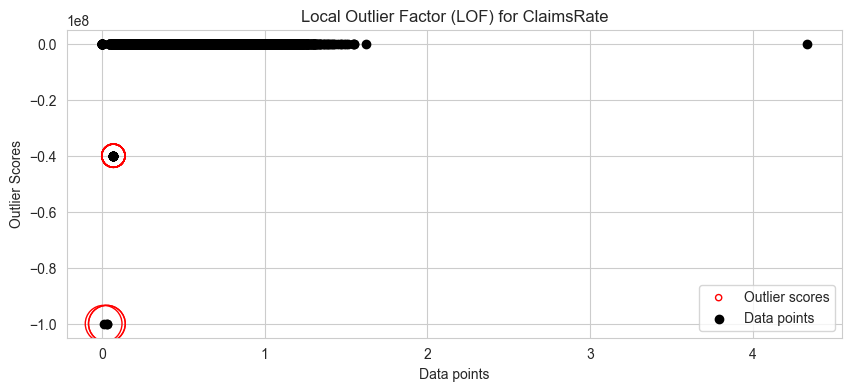

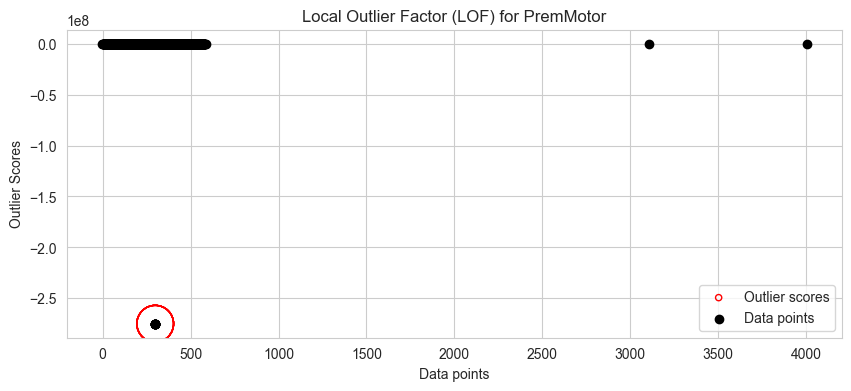

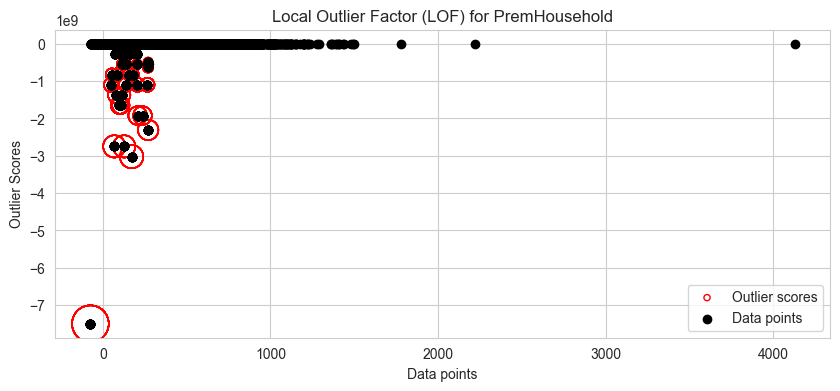

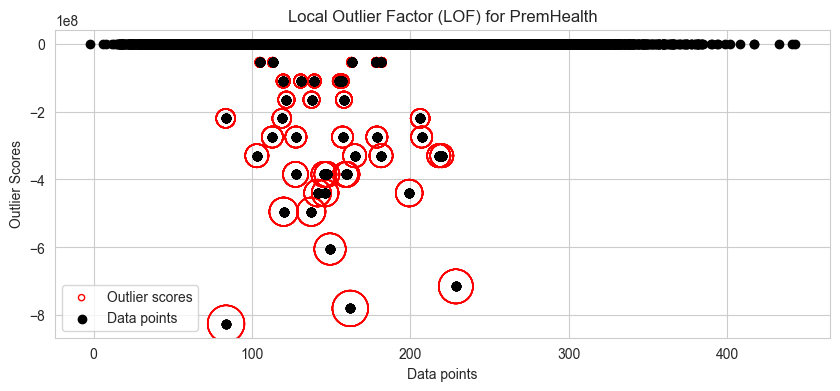

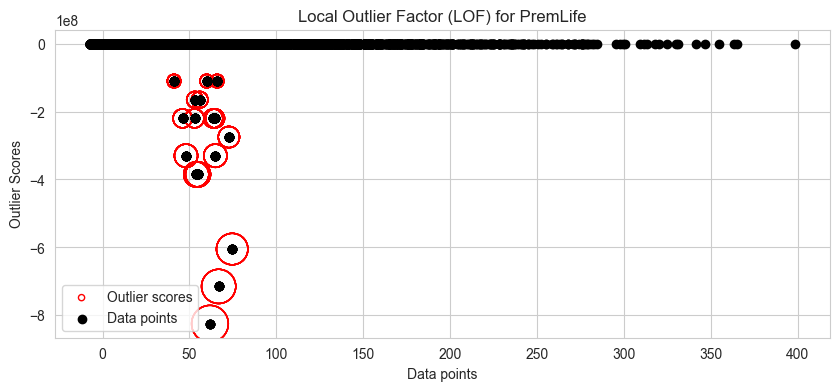

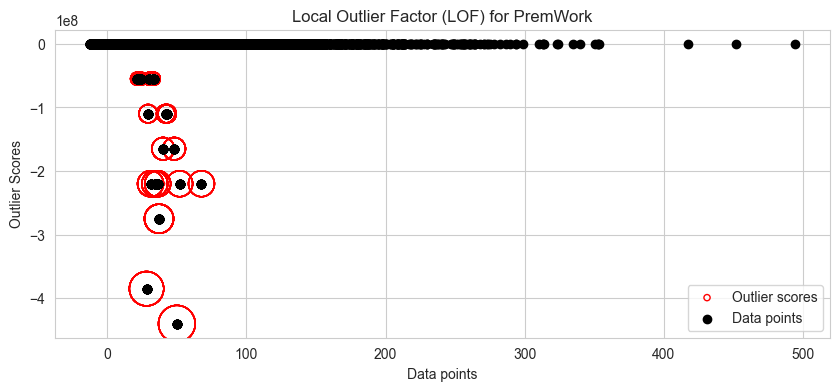

In [476]:
def check_LOF_outliers(data: pd.DataFrame, n_neighbors: int, contamination: float):
    '''
    This funcation detects outliers using Local Outlier Factor algorithm, computes the local density deviation of a given data point with respect to its neighbors.

    Args:
        data (pandas.DataFrame): set of data
        n_neighbors: integer of neighbors data points to use by distance calculation.
        contamination: The amount of contamination of the data set, which define the threshold of scores of the samples.

    '''
    outliers = pd.DataFrame()  # Define that outliers is a DataFrame
    cleaned_data = data.copy()  # Make a copy of the original data to create cleaned_data

    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination) # Create LOF model

    def update_legend_marker_size(handle, orig):
        '''
        Customize size of the legend marker
        '''
        handle.update_from(orig)
        handle.set_sizes([20])

    for col in cleaned_data.columns:
        
        X = df[[col]] # X is a feature in your DataFrame

        y_pred = lof.fit_predict(X)  # Use fit_predict instead of accessing negative_outlier_factor_    

        X_scores = lof.negative_outlier_factor_ # Access LOF scores (anomaly scores)

        # Identify outliers based on predicted labels
        col_outliers = data[y_pred == -1]
        outliers = pd.concat([outliers, col_outliers])

        # Plot circles with radius proportional to the outlier scores
        radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
        
        # Create a scatter
        plt.figure(figsize=(10, 4))
        scatter = plt.scatter(
            X.values,
            X_scores,
            s=700 * radius,
            edgecolors="r",
            facecolors="none",
            label="Outlier scores",
        )
        plt.scatter(X.values, X_scores, c='black',  label='Data points')  # Add this line to plot data points
        plt.axis("tight")
        plt.xlabel("Data points")
        plt.ylabel("Outlier Scores")
        plt.legend(
                    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
                )
        plt.title(f"Local Outlier Factor (LOF) for {col}")
        plt.show()

check_LOF_outliers(data=df[numerical], n_neighbors=20, contamination=0.3)

*** 
### <font color="White"> 2.4 Redundancy Study <a class="anchor" id="twofour"></a>

[<font color="grey">Back to Index </font>](#index)

*** 
#### <font color="White"> 2.4.1 Pearson Correlation <a class="anchor" id="twofourone"></a>

[<font color="grey">Back to Index </font>](#index)

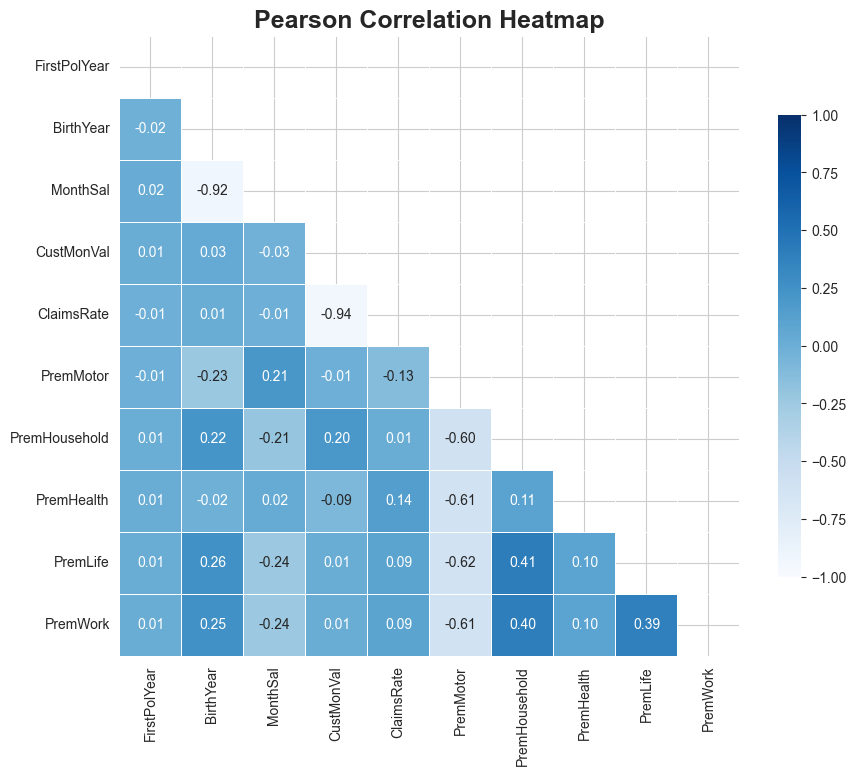

In [477]:
# Set color palette
cmap = sns.color_palette("Blues", as_cmap=True)

# Computing the pearson correlation matrix for numerical features 
corr = df[numerical].corr('pearson')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidths=.7,
            robust=True,
            cbar_kws={"shrink": .6},
            annot=True,
            fmt=".2f",
            annot_kws={"size": 10}
            )

# Customize title and fonts
plt.title("Pearson Correlation Heatmap", fontsize=18, fontweight="bold")
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()


*** 
#### <font color="White"> 2.4.2 Spearman Correlation <a class="anchor" id="twofourtwo"></a>

[<font color="grey">Back to Index </font>](#index)

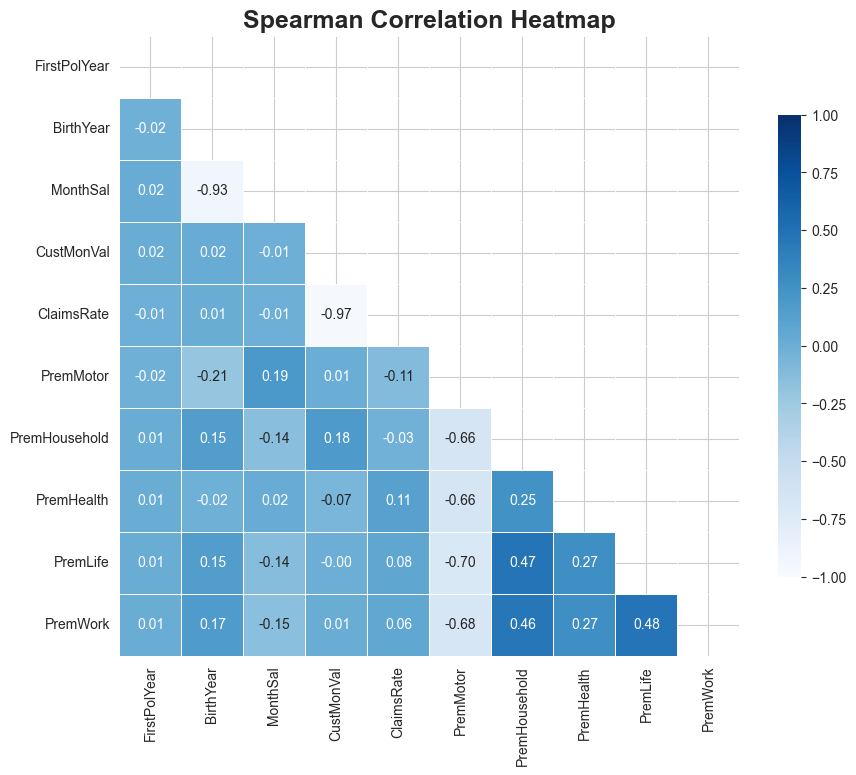

In [478]:
# Set color palette
cmap = sns.color_palette("Blues", as_cmap=True)

# Computing the pearson correlation matrix for numerical feactures 
corr = df[numerical].corr("spearman")

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(corr,
            mask = mask,
            cmap = cmap,
            vmax = 1,
            vmin = -1,
            center = 0,
            square = True,
            linewidths = .7,
            robust=True,
            cbar_kws = {"shrink": .6},
            annot = True,
            fmt = ".2f",
            annot_kws={"size":10}
           )

# Customize title and fonts
plt.title("Spearman Correlation Heatmap",fontsize = 18, fontweight = "bold")
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

In [479]:
# # ======= For Age Feature Test ======= #
 
# from datetime import datetime

# df['BirthYear'] = pd.to_datetime(df['BirthYear'], format='%Y')

# # Calculate the age based on the current year
# current_year = datetime.now().year
# df['Age'] = current_year - df['BirthYear'].dt.year

# # Set color palette
# cmap = sns.color_palette("Blues", as_cmap=True)

# # Computing the spearman correlation matrix for numerical feactures 
# corr = df[numerical+ ['Age']].corr("spearman")

# # Generating a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Plot the heatmap
# plt.figure(figsize = (10, 10))
# sns.heatmap(corr,
#             mask = mask,
#             cmap = cmap,
#             vmax = 1,
#             vmin = -1,
#             center = 0,
#             square = True,
#             linewidths = .7,
#             robust=True,
#             cbar_kws = {"shrink": .6},
#             annot = True,
#             fmt = ".2f",
#             annot_kws={"size":10}
#            )

# # Customize title and fonts
# plt.title("Spearman Correlation Heatmap",fontsize = 18, fontweight = "bold")
# plt.yticks(fontsize=10)
# plt.xticks(fontsize=10)
# plt.show()

# # Dropping the Age to avoid redundancy
# df.drop(["Age"], axis=1, inplace=True)


*** 
### <font color="White"> 2.5 Standardization and Normalization <a class="anchor" id="twofive"></a>

[<font color="grey">Back to Index </font>](#index)

*** 
#### <font color="White"> 2.5.1 Normalization <a class="anchor" id="twofiveone"></a>

[<font color="grey">Back to Index </font>](#index)

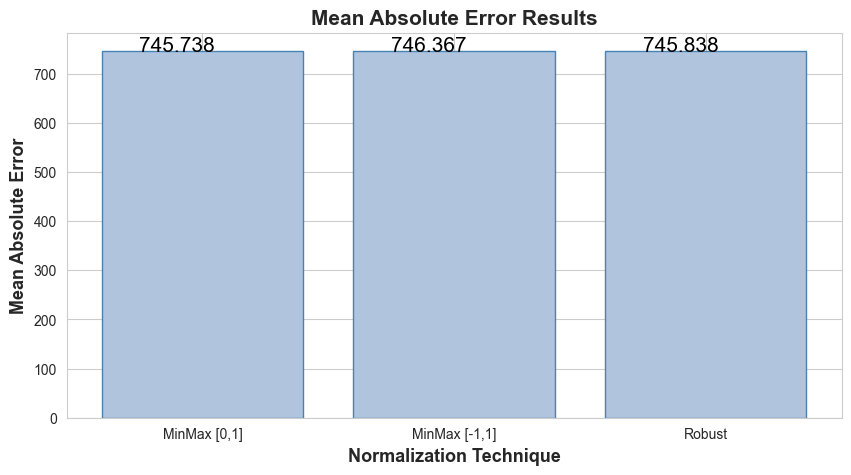

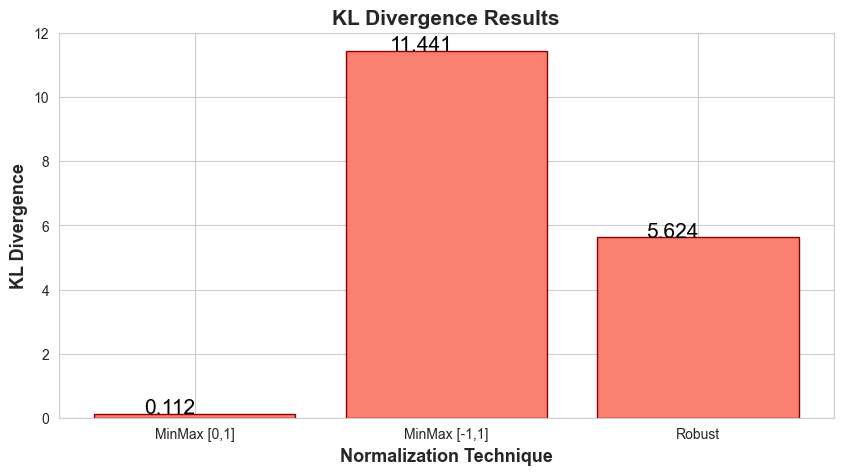

In [480]:
def kl_divergence(original, normalized, epsilon=1e-10):
    # Clip values to avoid log(0) in case of zero values ontherwise will return inf
    original = np.clip(original, epsilon, None)
    normalized = np.clip(normalized, epsilon, None)
    
    # Calculate KL Divergence for each column and take the mean
    kl_div = np.mean([entropy(original[col], normalized[col] + epsilon) for col in original.columns])
    return kl_div

def normalize_data(data, scaler):
    # Fit and transform data using the specified scaler
    X_normalized = scaler.fit_transform(data)
    return pd.DataFrame(X_normalized, columns=data.columns)

def plot_normalization_scores(data: pd.DataFrame):

    # Min Max standard
    def normalize_min_max_0_1(data):
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_normalized = normalize_data(data, scaler)
        return X_normalized

    # Min Max -1 1
    def normalize_min_max_m1_1(data):
        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_normalized = normalize_data(data, scaler)
        return X_normalized

    # Robust scaler
    def normalize_robust(data):
        scaler = RobustScaler()
        X_normalized = normalize_data(data, scaler)
        return X_normalized

    # Define the labels
    labels = ["MinMax [0,1]", "MinMax [-1,1]", "Robust"]
    # Compute the scores for each normalization technique based on MAE and KL Divergence
    scores_mae = []
    scores_kl = []

    for normalize_fn in [normalize_min_max_0_1, normalize_min_max_m1_1, normalize_robust]:
        X_normalized = normalize_fn(data)
        score_mae = mean_absolute_error(data.values, X_normalized.values)
        score_kl = kl_divergence(data, X_normalized)
        scores_mae.append(score_mae)
        scores_kl.append(score_kl)

    # Plot MAE
    plt.figure(figsize=(10, 5))
    bars = plt.bar(labels, scores_mae, color="LightSteelBlue", edgecolor="SteelBlue", label="Mean Absolute Error")
    # Add values on top of each bar
    
    for bar, value in zip(bars, scores_mae):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, round(value, 3),
                 ha='center', color='black', fontsize=15)
    plt.xlabel("Normalization Technique", fontsize=13, fontweight="bold")
    plt.ylabel("Mean Absolute Error", fontsize=13, fontweight="bold")
    plt.title("Mean Absolute Error Results", fontsize=15, fontweight="bold")
    plt.show()

    # Plot KL Divergence
    plt.figure(figsize=(10, 5))
    bars = plt.bar(labels, scores_kl, color="Salmon", edgecolor="DarkRed", label="KL Divergence")
    # Add values on top of each bar
    for bar, value in zip(bars, scores_kl):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, round(value, 3),
                 ha='center', color='black', fontsize=15)
    plt.xlabel("Normalization Technique", fontsize=13, fontweight="bold")
    plt.ylabel("KL Divergence", fontsize=13, fontweight="bold")
    plt.title("KL Divergence Results", fontsize=15, fontweight="bold")
    plt.show()

# Execute measures
plot_normalization_scores(df[numerical])

In [481]:
def normalize_data(data):
    numerical_data = data[numerical]  # Select only numerical columns
    index_column = data.index  # Save the index column

    scaler = MinMaxScaler(feature_range=(0, 1)) # Best scaler
    X_normalized = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns, index=index_column)

    # Concatenate the normalized numerical data with the categorical columns
    normalized_data = pd.concat([X_normalized, data[categorical]], axis=1)

    return normalized_data

# Store normalization data 
df_norm = normalize_data(df)
df_norm.tail()

,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducDeg,Children,GeoLivArea
CustID,,,,,,,,,,,,,
10291,0.833333,0.969697,0.062500,0.444028,0.196305,0.002745,0.226716,0.236510,0.296126,0.421379,1 - Basic,1.0,3.0
10292,0.416667,0.212121,0.609002,0.326522,0.221709,0.099275,0.029591,0.395352,0.041401,0.052914,4 - PhD,0.0,2.0
10294,0.833333,0.621212,0.551408,0.675777,0.048499,0.101743,0.049409,0.324426,0.048532,0.033373,3 - BSc/MSc,1.0,1.0
10295,0.291667,0.636364,0.349403,0.493191,0.150115,0.048084,0.068039,0.450547,0.174932,0.246809,1 - Basic,1.0,2.0
10296,0.666667,0.696970,0.529437,0.635568,0.062356,0.104351,0.040291,0.322179,0.034271,0.049180,4 - PhD,1.0,1.0


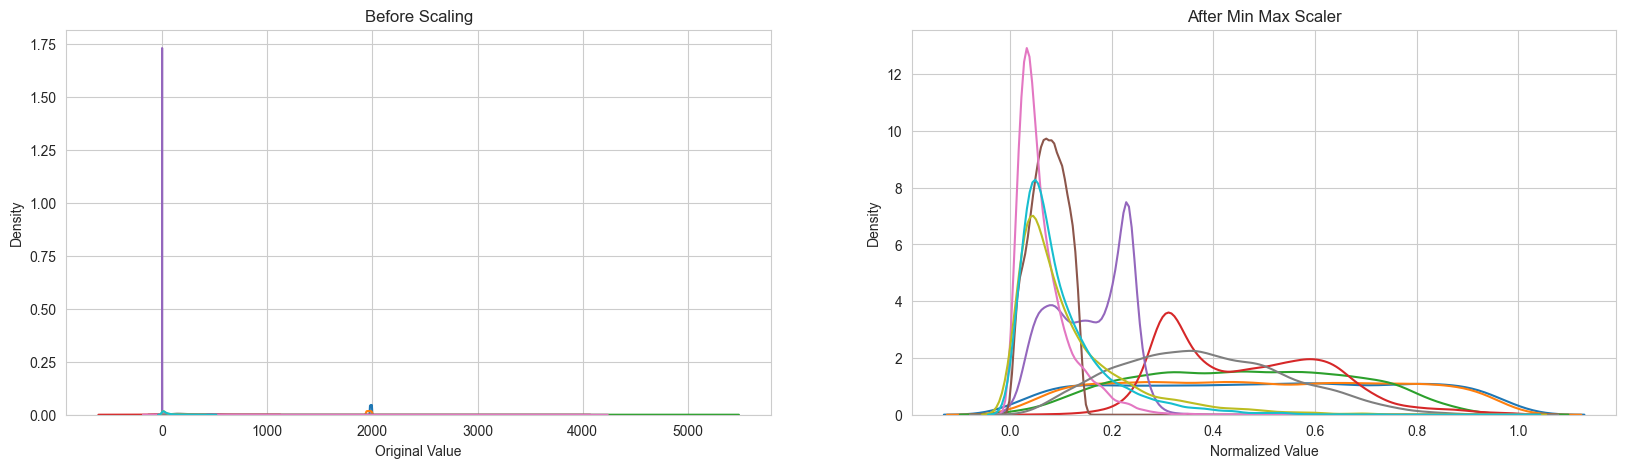

In [482]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title('Before Scaling')
for col in df[numerical].columns:
    sns.kdeplot(df[col], ax=ax1)
ax1.set_xlabel('Original Value') # Set X-axis label
ax1.set_ylabel('Density') # Set Y-axis label

ax2.set_title('After Min Max Scaler')
for col in df_norm[numerical].columns:
    sns.kdeplot(df_norm[col], ax=ax2)
ax2.set_xlabel('Normalized Value') # Set X-axis label
ax2.set_ylabel('Density') # Set Y-axis label
plt.show()

*** 
#### <font color="White"> 2.5.2 Standardization <a class="anchor" id="twofivetwo"></a>

[<font color="grey">Back to Index </font>](#index)

In [483]:
def standarize_data(data):
    numerical_data = data[numerical]  # Select only numerical columns
    index_column = data.index  # Save the index column

    scaler = StandardScaler()  # Z-Score standardization
    X_normalized = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns, index=index_column)

    # Concatenate the standardarized numerical data with the categorical columns
    normalized_data = pd.concat([X_normalized, data[categorical]], axis=1)

    return normalized_data

# Store standardarized data 
df_stand = standarize_data(df)
df_stand.tail()

,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducDeg,Children,GeoLivArea
CustID,,,,,,,,,,,,,
10291,1.210526,1.797978,-1.924046,-0.137166,0.517919,-2.026269,3.036313,-0.879178,1.520214,3.473459,1 - Basic,1.0,3.0
10292,-0.304977,-1.094359,0.695610,-0.868202,0.863366,0.652661,-0.670386,0.075103,-0.672650,-0.553907,4 - PhD,0.0,2.0
10294,1.210526,0.467503,0.419534,1.304595,-1.491959,0.721149,-0.297727,-0.351002,-0.611266,-0.767499,3 - BSc/MSc,1.0,1.0
10295,-0.759627,0.525349,-0.548778,0.168686,-0.110168,-0.767999,0.052578,0.406698,0.476883,1.565384,1 - Basic,1.0,2.0
10296,0.604325,0.756736,0.314216,1.054450,-1.303533,0.793516,-0.469190,-0.364503,-0.734035,-0.594725,4 - PhD,1.0,1.0


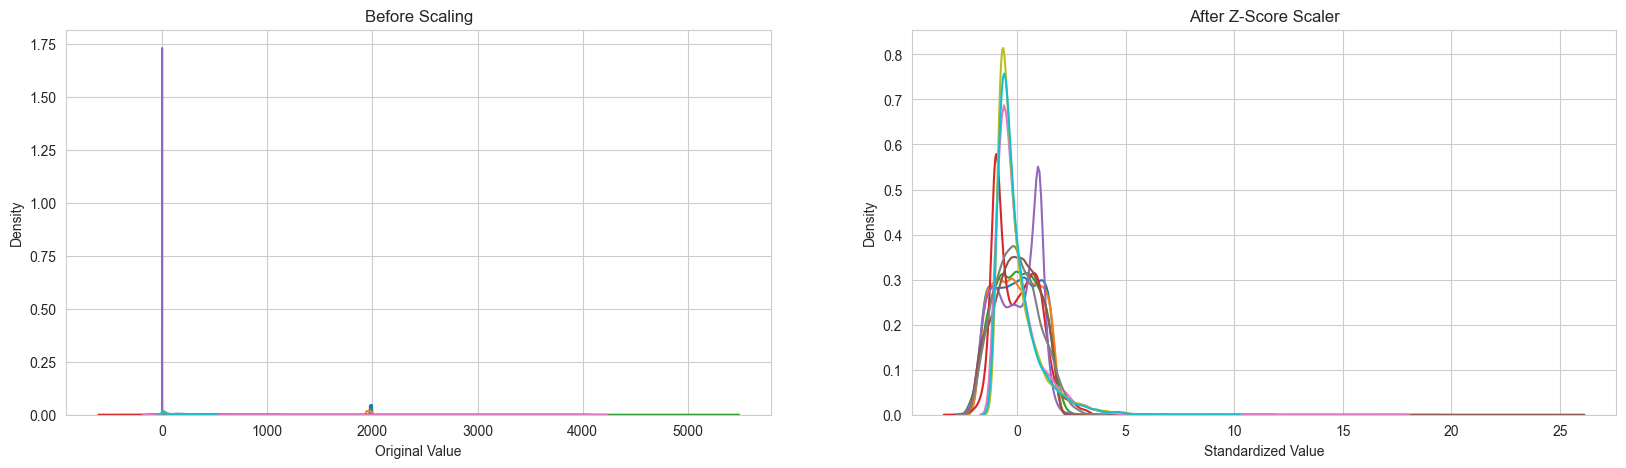

In [484]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title('Before Scaling')
for col in df[numerical].columns:
    sns.kdeplot(df[col], ax=ax1)
ax1.set_xlabel('Original Value') # Set X-axis label
ax1.set_ylabel('Density') # Set Y-axis label

ax2.set_title('After Z-Score Scaler')
for col in df_stand[numerical].columns:
    sns.kdeplot(df_stand[col], ax=ax2)
ax2.set_xlabel('Standardized Value') # Set X-axis label
ax2.set_ylabel('Density') # Set Y-axis label
plt.show()

*** 
### <font color="White"> 2.6 Categorical Features Encoding <a class="anchor" id="twosix"></a>

[<font color="grey">Back to Index </font>](#index)

In [485]:
df_norm[categorical]

,EducDeg,Children,GeoLivArea
CustID,,,
1,2 - High School,1.0,1.0
2,2 - High School,1.0,4.0
3,1 - Basic,0.0,3.0
4,3 - BSc/MSc,1.0,4.0
5,3 - BSc/MSc,1.0,4.0
...,...,...,...
10291,1 - Basic,1.0,3.0
10292,4 - PhD,0.0,2.0
10294,3 - BSc/MSc,1.0,1.0


In [486]:
df_norm['EducDeg'].value_counts()

EducDeg
3 - BSc/MSc        4791
2 - High School    3477
1 - Basic          1213
4 - PhD             697
Name: count, dtype: int64

*** 
#### <font color="White"> 2.6.1 One-Hot Encoding <a class="anchor" id="twosixone"></a>

[<font color="grey">Back to Index </font>](#index)

In [487]:
# Apply one-hot encoding
one_hot_encoded_norm = pd.get_dummies(df_norm["EducDeg"], prefix="EducDeg")
one_hot_encoded_stand = pd.get_dummies(df_stand["EducDeg"], prefix="EducDeg")

# Concatenate the one-hot encoded featur with the original DataFrame
df_norm = pd.concat([df_norm, one_hot_encoded_norm], axis=1)
df_stand = pd.concat([df_stand, one_hot_encoded_stand], axis=1)

# Drop the "EducDeg" feature, is already encoded
df_norm = df_norm.drop("EducDeg", axis=1)
df_stand = df_stand.drop("EducDeg", axis=1)

# Replace True with 1 and False with 0 in the "EducDeg" feature
df_norm = df_norm.replace({True: 1, False: 0})
df_stand = df_stand.replace({True: 1, False: 0})

# Display the result
df_norm.head()

,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Children,GeoLivArea,EducDeg_1 - Basic,EducDeg_2 - High School,EducDeg_3 - BSc/MSc,EducDeg_4 - PhD
CustID,,,,,,,,,,,,,,,,
1,0.458333,0.712121,0.393345,0.580416,0.090069,0.094811,0.036724,0.333663,0.133259,0.057084,1.0,1.0,0,1,0,0
2,0.291667,0.909091,0.073379,0.239230,0.258661,0.020354,0.116794,0.266984,0.497113,0.233412,1.0,4.0,0,1,0,0
3,0.708333,0.530303,0.414676,0.662831,0.064665,0.052466,0.071213,0.284716,0.230323,0.219364,0.0,3.0,1,0,0,0
4,0.666667,0.696970,0.163396,0.315276,0.228637,0.046560,0.028140,0.704047,0.104466,0.079708,1.0,4.0,0,0,1,0
5,0.500000,0.575758,0.305034,0.350067,0.207852,0.085521,0.029198,0.415084,0.063607,0.105612,1.0,4.0,0,0,1,0


In [ ]:
%store df_norm
%store df_stand